# Unsupervised Learning
Explore investment data, summarize key stats, use K-Means and PCA for clustering, adapt trading algorithms, and identify risk factors to enhance model insights on outperformance

In [5]:
import yfinance as yf
import pandas as pd

# Download historical data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Close']

# Convert index to date only (removing timestamp)
data.index = data.index.date

# Display the first few rows to inspect
data.head()


[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
2020-01-02,75.087502,94.900497,68.433998,160.619995,28.684000
2020-01-03,74.357498,93.748497,68.075996,158.619995,29.534000
2020-01-06,74.949997,95.143997,69.890503,159.029999,30.102667
2020-01-07,74.597504,95.343002,69.755501,157.580002,31.270666
2020-01-08,75.797501,94.598503,70.251999,160.089996,32.809334


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    756 non-null    float64
 1   AMZN    756 non-null    float64
 2   GOOGL   756 non-null    float64
 3   MSFT    756 non-null    float64
 4   TSLA    756 non-null    float64
dtypes: float64(5)
memory usage: 35.4+ KB


In [9]:
data.shape

(756, 5)

In [14]:
daily_returns = data.pct_change().dropna()
daily_returns.describe()

Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
count,755.000000,755.000000,755.000000,755.000000,755.000000
mean,0.000997,0.000141,0.000573,0.000771,0.002965
std,0.023268,0.024621,0.021748,0.021904,0.045474
min,-0.128647,-0.140494,-0.116341,-0.147390,-0.210628
25%,-0.011103,-0.012856,-0.009675,-0.009685,-0.021480
50%,0.000613,0.000554,0.001088,0.000560,0.001953
75%,0.014154,0.012240,0.012000,0.012255,0.024981
max,0.119808,0.135359,0.092412,0.142169,0.198949


In [16]:
# Calculate Cumulative Returns
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.tail()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
2022-12-23,0.756085,-0.101691,0.303884,0.486303,3.293334
2022-12-27,0.731713,-0.124978,0.276997,0.475283,2.803514
2022-12-28,0.678575,-0.137834,0.256978,0.460154,2.929368
2022-12-29,0.726120,-0.112966,0.292486,0.500498,3.246967
2022-12-30,0.730381,-0.114862,0.289271,0.493089,3.294380


**Summary Statistics:** For risk assessment, calculate each asset's mean return, volatility, and correlation with other assets.

In [20]:
# Mean return and volatility
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# Correlation matrix
correlation_matrix = daily_returns.corr()

print("Mean Returns:\n", mean_returns)
print("Volatility:\n", volatility)
print("Correlation Matrix:\n", correlation_matrix)

Mean Returns:
 Ticker
AAPL     0.000997
AMZN     0.000141
GOOGL    0.000573
MSFT     0.000771
TSLA     0.002965
dtype: float64
Volatility:
 Ticker
AAPL     0.023268
AMZN     0.024621
GOOGL    0.021748
MSFT     0.021904
TSLA     0.045474
dtype: float64
Correlation Matrix:
 Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    1.000000  0.662707  0.730107  0.811198  0.519510
AMZN    0.662707  1.000000  0.679468  0.701592  0.477203
GOOGL   0.730107  0.679468  1.000000  0.830067  0.452409
MSFT    0.811198  0.701592  0.830067  1.000000  0.500395
TSLA    0.519510  0.477203  0.452409  0.500395  1.000000


<Figure size 1200x600 with 0 Axes>

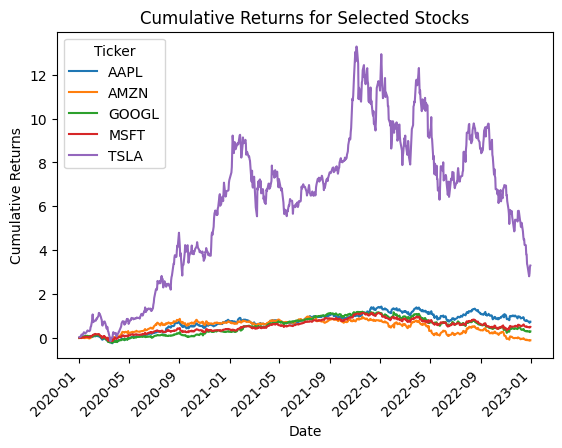

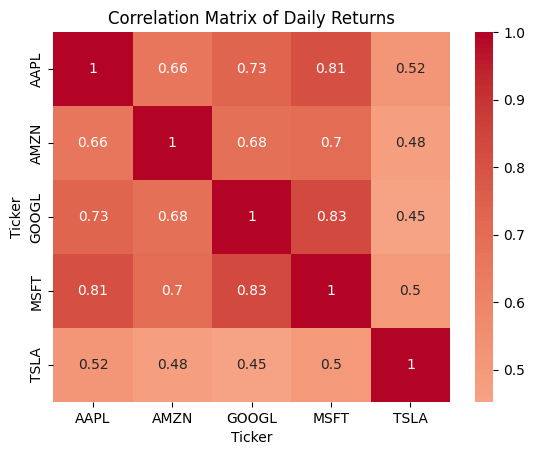

In [25]:
import matplotlib.pyplot as plt

# Plot cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot(title='Cumulative Returns for Selected Stocks')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Plot correlation heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Daily Returns')
plt.show()
